In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [31]:
current_dir = os.getcwd()
normalized_path = os.path.normpath(os.path.join(current_dir, 'results.csv'))
df=pd.read_csv(normalized_path)

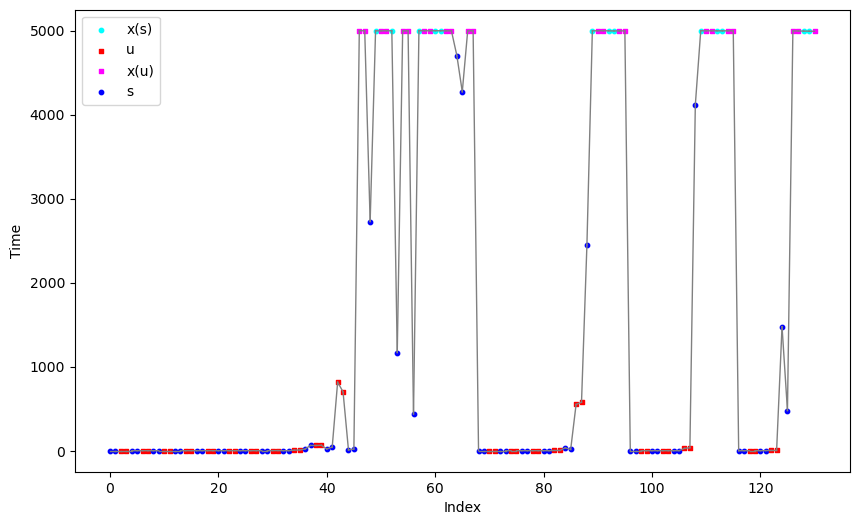

In [33]:
# グラフ作成

# プロット用の色と形状のマッピング
color_map = {'s': 'blue', 'u': 'red', 'x': {'s': 'cyan', 'u': 'magenta'}}
marker_map = {'s': 'o', 'u': 's', 'x': {'s': 'o', 'u': 's'}}
label_map = {'s': 's', 'u': 'u', 'x': {'s': 'x(s)', 'u': 'x(u)'}}
size_map = {'s': 100, 'u': 100, 'x': {'s': 200, 'u': 200}}  # ノードのサイズを調整


fig, ax = plt.subplots(figsize=(10,6))
prev_index = None
for idx, row in df.iterrows():
    color = color_map[row['Result']]
    marker = marker_map[row['Result']]
    label = label_map[row['Result']]
    size = 10
    if row['Result'] == 'x':
        color = color_map[row['Result']][row['TResult']]
        marker = marker_map[row['Result']][row['TResult']]
        label = label_map[row['Result']][row['TResult']]
    ax.scatter(idx, row['Time'], color=color, marker=marker, label=label, s=size)  # ノードのサイズを指定
    if prev_index is not None and idx - prev_index == 1:
        ax.plot([prev_index, idx], [df.loc[prev_index, 'Time'], row['Time']], color='gray', linewidth=1)  # 連続する部分を線でつなぐ
    prev_index = idx

# 軸ラベル設定
ax.set_xlabel('Index')
ax.set_ylabel('Time')

# 凡例表示
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]
ax.legend(unique_handles, unique_labels)

plt.show()

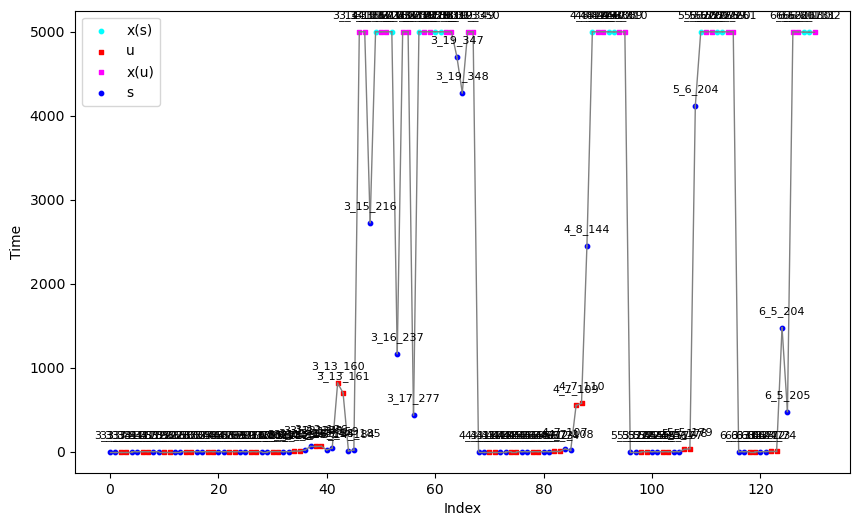

In [35]:
# グラフ作成(問題番号あり)
fig, ax = plt.subplots(figsize=(10,6))
prev_index = None
for idx, row in df.iterrows():
    color = color_map[row['Result']]
    marker = marker_map[row['Result']]
    label = label_map[row['Result']]
    size = 10
    if row['Result'] == 'x':
        color = color_map[row['Result']][row['TResult']]
        marker = marker_map[row['Result']][row['TResult']]
        label = label_map[row['Result']][row['TResult']]
    ax.scatter(idx, row['Time'], color=color, marker=marker, label=label, s=size)  # ノードのサイズを指定
    if prev_index is not None and idx - prev_index == 1:
        ax.plot([prev_index, idx], [df.loc[prev_index, 'Time'], row['Time']], color='gray', linewidth=1)  # 連続する部分を線でつなぐ
    prev_index = idx

# 軸ラベル設定
ax.set_xlabel('Index')
ax.set_ylabel('Time')

# 凡例表示
handles, labels = ax.get_legend_handles_labels()
unique_labels = list(set(labels))
unique_handles = [handles[labels.index(label)] for label in unique_labels]
ax.legend(unique_handles, unique_labels)

# 各点に問題番号を表示する
for i, txt in enumerate(df['Problem']):
    plt.annotate(txt, (df.index[i], df['Time'][i]), textcoords="offset points", xytext=(0,10), ha='center', size=8)

plt.show()